# Compare barcode partitions

## Load libraries

In [1]:
options(warn = -1)

suppressPackageStartupMessages({
library(tidyverse)
library(rasilabRtemplates)
})

theme_set(theme_rasilab() + 
 theme(
  axis.line = element_line(color = "grey"), 
 axis.title.y = element_text(margin = margin(r=10)),
 axis.title.x = element_text(margin = margin(t=10))
))

fdr_cutoff <- 0.05
sgrna_cutoff <- 3

## Load MaGeCK gene splicing data

In [2]:
mageck_gene <- list.files("../data/mageck/", full.names = T, recursive = T, pattern = "gene_summary.tsv$") %>%
  as_tibble_col("file") %>%
  filter(str_detect(file, "ntc"), str_detect(file, "retained|skipped")) %>%
  mutate(sample_name = str_extract(file, "(?<=mageck//).+(?=/mageck.)")) %>%
  separate(sample_name, c("treatment", "control"), sep = "_vs_", remove = F) %>%
  mutate(data = map(file, . %>% read_tsv(show_col_types = F))) %>%
  select(-file) %>%
  unnest(data) %>%
  janitor::clean_names() %>%
  select(-neg_lfc) %>%
  rename(lfc = pos_lfc, gene = id) %>%
  filter(!str_detect(gene, "MCHERRY|PURO")) %>%
  mutate(pos_fdr = if_else(is.na(pos_fdr), 1, pos_fdr)) %>%
  arrange(pos_rank) %>% 
  filter(str_detect(treatment, "day7")) %>%
  mutate(day = str_replace(str_extract(treatment, "day\\d+"), "day", "day ")) %>%
  mutate(isoform = str_extract(treatment, "(e2|i1|i2)_.+"))


mageck_gene

sample_name,treatment,control,gene,num,neg_score,neg_p_value,neg_fdr,neg_rank,neg_goodsgrna,pos_score,pos_p_value,pos_fdr,pos_rank,pos_goodsgrna,lfc,day,isoform
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ntc_day7_dmso_bc1_e2_skipped_vs_ntc_day7_dmso_bc1_total,ntc_day7_dmso_bc1_e2_skipped,ntc_day7_dmso_bc1_total,SF3B5,4,1,1,NA,2186,0,1.8201e-10,2.2646e-06,0.000180,1,4,5.2551,day 7,e2_skipped
ntc_day7_dmso_bc1_i1_retained_vs_ntc_day7_dmso_bc1_total,ntc_day7_dmso_bc1_i1_retained,ntc_day7_dmso_bc1_total,AQR,4,1,1,NA,2186,0,1.0186e-09,2.2646e-06,0.000207,1,4,3.1955,day 7,i1_retained
ntc_day7_dmso_bc1_i2_retained_vs_ntc_day7_dmso_bc1_total,ntc_day7_dmso_bc1_i2_retained,ntc_day7_dmso_bc1_total,PPWD1,4,1,1,0.999998,2186,0,7.2157e-10,2.2646e-06,0.000275,1,4,2.0739,day 7,i2_retained
ntc_day7_dmso_bc1_e2_skipped_vs_ntc_day7_dmso_bc1_total,ntc_day7_dmso_bc1_e2_skipped,ntc_day7_dmso_bc1_total,SNRPA1,4,1,1,NA,2185,0,4.9737e-10,2.2646e-06,0.000180,2,4,4.4094,day 7,e2_skipped
ntc_day7_dmso_bc1_i1_retained_vs_ntc_day7_dmso_bc1_total,ntc_day7_dmso_bc1_i1_retained,ntc_day7_dmso_bc1_total,GPKOW,4,1,1,NA,2185,0,3.8217e-09,2.2646e-06,0.000207,2,4,1.0993,day 7,i1_retained
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ntc_day7_dmso_bc1_i1_retained_vs_ntc_day7_dmso_bc1_total,ntc_day7_dmso_bc1_i1_retained,ntc_day7_dmso_bc1_total,TP53RK,4,5.6999e-04,2.2261e-03,0.100812,9,4,0.99943,0.99945,1.000000,2185,0,-0.26156,day 7,i1_retained
ntc_day7_dmso_bc1_i2_retained_vs_ntc_day7_dmso_bc1_total,ntc_day7_dmso_bc1_i2_retained,ntc_day7_dmso_bc1_total,RBM14,4,1.3154e-04,5.0501e-04,0.367987,3,4,0.99987,0.99987,0.999984,2185,0,-0.36896,day 7,i2_retained
ntc_day7_dmso_bc1_e2_skipped_vs_ntc_day7_dmso_bc1_total,ntc_day7_dmso_bc1_e2_skipped,ntc_day7_dmso_bc1_total,H1-10,4,3.8016e-04,1.5377e-03,0.111012,4,4,0.99962,0.99962,1.000000,2186,0,-1.14920,day 7,e2_skipped


In [3]:
gene_hits <- mageck_gene %>% 
  filter(pos_fdr <= fdr_cutoff & pos_goodsgrna >= sgrna_cutoff) %>% 
  distinct(gene) %>% 
  print()

# A tibble: 136 × 1
   gene  
   <chr> 
 1 SF3B5 
 2 AQR   
 3 PPWD1 
 4 SNRPA1
 5 GPKOW 
 6 NUTF2 
 7 IPO13 
 8 TFIP11
 9 KPNB1 
10 SF3B1 
# … with 126 more rows


## Load MaGeCK splicing partitioned gene data

In [4]:
mageck_gene_random_partition <- list.files("../data/mageck_random_partition/", full.names = T, recursive = T, pattern = "gene_summary.tsv$") %>%
  as_tibble_col("file") %>%
  filter(str_detect(file, "ntc"), str_detect(file, "retained|skipped")) %>%
  mutate(sample_name = str_extract(file, "(?<=mageck_random_partition//).+(?=/mageck.)")) %>%
  separate(sample_name, c("treatment", "control"), sep = "_vs_", remove = F) %>%
  mutate(data = map(file, . %>% read_tsv(show_col_types = F))) %>%
  select(-file) %>%
  unnest(data) %>%
  janitor::clean_names() %>%
  select(-neg_lfc) %>%
  rename(lfc = pos_lfc, gene = id) %>%
  filter(!str_detect(gene, "MCHERRY|PURO")) %>%
  # filter(pos_fdr > fdr_cutoff | pos_goodsgrna >= sgrna_cutoff) %>% 
  arrange(pos_rank) %>% 
  filter(str_detect(treatment, "day7")) %>%
  mutate(day = str_replace(str_extract(treatment, "day\\d+"), "day", "day ")) %>%
  mutate(isoform = str_extract(treatment, "(e2|i1|i2)_.+"))


mageck_gene_random_partition

sample_name,treatment,control,gene,num,neg_score,neg_p_value,neg_fdr,neg_rank,neg_goodsgrna,pos_score,pos_p_value,pos_fdr,pos_rank,pos_goodsgrna,lfc,day,isoform
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ntc_day7_dmso_bc1_e2_skipped_vs_ntc_day7_dmso_bc1_total,ntc_day7_dmso_bc1_e2_skipped,ntc_day7_dmso_bc1_total,SF3B5_A,4,1,1,0.999999,4370,0,8.7551e-12,1.1328e-06,0.000825,1,4,5.4907,day 7,e2_skipped
ntc_day7_dmso_bc1_i1_retained_vs_ntc_day7_dmso_bc1_total,ntc_day7_dmso_bc1_i1_retained,ntc_day7_dmso_bc1_total,AQR_B,3,1,1,0.999999,4371,0,8.3261e-09,1.1326e-06,0.000990,1,3,3.7346,day 7,i1_retained
ntc_day7_dmso_bc1_i2_retained_vs_ntc_day7_dmso_bc1_total,ntc_day7_dmso_bc1_i2_retained,ntc_day7_dmso_bc1_total,PPWD1_A,4,1,1,0.999999,4371,0,1.1035e-09,1.1326e-06,0.000291,1,4,2.1837,day 7,i2_retained
ntc_day7_dmso_bc1_e2_skipped_vs_ntc_day7_dmso_bc1_total,ntc_day7_dmso_bc1_e2_skipped,ntc_day7_dmso_bc1_total,SNRPA1_B,4,1,1,0.999999,4369,0,3.1218e-09,1.1328e-06,0.000825,2,4,4.7616,day 7,e2_skipped
ntc_day7_dmso_bc1_i1_retained_vs_ntc_day7_dmso_bc1_total,ntc_day7_dmso_bc1_i1_retained,ntc_day7_dmso_bc1_total,TFIP11_B,4,1,1,0.999999,4370,0,1.6415e-08,1.1326e-06,0.000990,2,4,1.2505,day 7,i1_retained
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ntc_day7_dmso_bc1_e2_skipped_vs_ntc_day7_dmso_bc1_total,ntc_day7_dmso_bc1_e2_skipped,ntc_day7_dmso_bc1_total,C14ORF93_B,3,4.8318e-04,1.3719e-03,0.908938,4,3,0.99952,0.99956,0.999557,4370,0,-1.39050,day 7,e2_skipped
ntc_day7_dmso_bc1_i1_retained_vs_ntc_day7_dmso_bc1_total,ntc_day7_dmso_bc1_i1_retained,ntc_day7_dmso_bc1_total,TRIM28_A,4,2.9333e-04,1.0635e-03,0.521246,5,4,0.99971,0.99970,0.999922,4370,0,-0.35688,day 7,i1_retained
ntc_day7_dmso_bc1_i2_retained_vs_ntc_day7_dmso_bc1_total,ntc_day7_dmso_bc1_i2_retained,ntc_day7_dmso_bc1_total,SNRNP25_A,4,1.2843e-04,4.4737e-04,0.325908,6,4,0.99987,0.99988,0.999972,4370,0,-0.48910,day 7,i2_retained


## Compare splicing barcode partitions

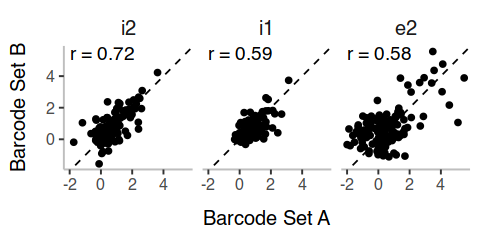

In [5]:
options(repr.plot.width = 4, repr.plot.height = 2)
plot_data <- mageck_gene_random_partition %>% 
  separate(gene, c("gene", "barcode_group"), sep = "_") %>%
  mutate(isoform = str_replace(isoform, "_retained|_skipped", "")) %>% 
  inner_join(gene_hits, by = "gene") %>%
  select(isoform, lfc, gene, barcode_group) %>% 
  pivot_wider(names_from = barcode_group, values_from = lfc)


correlation  <- plot_data %>% 
  group_by(isoform) %>% 
  nest() %>% 
  mutate(cor = map(data, function(df) cor.test(~ A + B, data=df, method = "pearson", exact = F))) %>% 
  mutate(cor = map(cor, broom::tidy)) %>%
  select(-data) %>% 
  unnest(cor) 

plot_data %>% 
  ggplot(aes(x = A, y = B)) +
  facet_wrap(~fct_rev(isoform)) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed") +
  geom_point() +
  geom_text(data = correlation, aes(label = paste0("r = ", round(estimate, 2))), x = -2, y = 5, hjust = 0, vjust = 0, size = 4) +
  labs(x = "Barcode Set A", y = "Barcode Set B")

ggsave("../figures/mageck_splicing_scatter.pdf", width = 4, height = 2)

## Heat map of splicing screen correlation coefficients

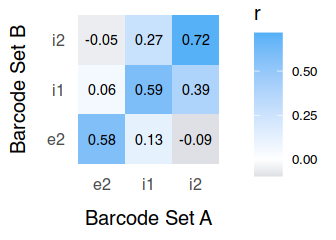

In [6]:
options(repr.plot.width = 2.8, repr.plot.height = 2)

corr_data <- mageck_gene_random_partition %>% 
  separate(gene, c("gene", "barcode_group"), sep = "_") %>%
  inner_join(gene_hits, by = "gene") %>%
  mutate(isoform = str_replace(isoform, "_retained|_skipped", "")) %>% 
  select(isoform, lfc, gene, barcode_group) %>% 
  pivot_wider(names_from = barcode_group, values_from = lfc) %>% 
  rename(sample_name = isoform)

plot_data <- corr_data %>% 
  distinct(sample_name) %>% 
  rename(sample1 = sample_name) %>% 
  mutate(sample2 = sample1) %>% 
  expand(sample1, sample2) %>% 
  mutate(r = map2_dbl(sample1, sample2, function(x,y) {
    xvec <- corr_data %>% filter(sample_name == x) %>% select(gene, A)
    yvec <- corr_data %>% filter(sample_name == y) %>% select(gene, B)
    joint <- inner_join(xvec, yvec, by = "gene")
    cor.test(joint$A, joint$B, method = "pearson")$estimate
  }))

plot_data %>% 
  ggplot(aes(x = sample1, y = sample2, fill = r)) +
  geom_tile() +
  geom_text(aes(label = round(r, 2)), size = 3) +
  scale_fill_gradient2(low = "#132B43", high = "#56B1F7") +
  theme(
  axis.line = element_blank(),
  axis.ticks = element_blank(),
  legend.text = element_text(size = 8),
  ) +
  labs(x = "Barcode Set A", y = "Barcode Set B")

ggsave("../figures/mageck_splicing_correlation.pdf", width = 2.8, height = 2, units = "in")

## Load MaGeCK fitness data

In [7]:
mageck_gene <- list.files("../data/mageck/", full.names = T, recursive = T, pattern = "gene_summary.tsv$") %>%
  as_tibble_col("file") %>%
  filter(str_detect(file, "ntc.+bc1.+(total|grna).+ntc.+bc1.+(total|grna)")) %>%
  mutate(sample_name = str_extract(file, "(?<=mageck//).+(?=/mageck.)")) %>%
  separate(sample_name, c("treatment", "control"), sep = "_vs_", remove = F) %>%
  mutate(data = map(file, . %>% read_tsv(show_col_types = F))) %>%
  select(-file) %>%
  unnest(data) %>%
  janitor::clean_names() %>%
  select(-pos_lfc) %>%
  rename(lfc = neg_lfc, gene = id) %>%
  arrange(neg_rank)

mageck_gene

sample_name,treatment,control,gene,num,neg_score,neg_p_value,neg_fdr,neg_rank,neg_goodsgrna,lfc,pos_score,pos_p_value,pos_fdr,pos_rank,pos_goodsgrna
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ntc_day1_bc1_total_vs_ntc_day1_bc1_grna,ntc_day1_bc1_total,ntc_day1_bc1_grna,ADAT2,4,2.3029e-04,9.6247e-04,NA,1,2,0.043389,0.65457,0.65312,NA,1421,0
ntc_day13_bc1_grna_vs_ntc_day1_bc1_grna,ntc_day13_bc1_grna,ntc_day1_bc1_grna,RPS24,4,1.3766e-06,6.7939e-06,0.002769,1,4,-5.046500,1.00000,1.00000,NA,2186,0
ntc_day13_bc1_total_vs_ntc_day1_bc1_total,ntc_day13_bc1_total,ntc_day1_bc1_total,PRPF19,4,3.1612e-08,2.2646e-06,0.001748,1,4,-7.521600,1.00000,1.00000,NA,2186,0
ntc_day13_bc1_total_vs_ntc_day13_bc1_grna,ntc_day13_bc1_total,ntc_day13_bc1_grna,XPO6,4,1.9966e-05,6.6067e-05,0.037923,1,3,-5.118100,0.54215,0.54273,NA,1126,0
ntc_day21_bc1_grna_vs_ntc_day1_bc1_grna,ntc_day21_bc1_grna,ntc_day1_bc1_grna,RPS24,4,1.4135e-06,6.7939e-06,0.005272,1,4,-4.330200,1.00000,1.00000,NA,2186,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ntc_day3_bc1_total_vs_ntc_day1_bc1_total,ntc_day3_bc1_total,ntc_day1_bc1_total,RAX,4,0.99982,0.99983,NA,2186,0,0.47897,1.8049e-04,7.0883e-04,0.081752,3,4
ntc_day5_bc1_grna_vs_ntc_day1_bc1_grna,ntc_day5_bc1_grna,ntc_day1_bc1_grna,UBE2O,4,0.99985,0.99986,0.999862,2186,0,1.14780,1.4163e-01,1.4035e-01,0.980214,313,0
ntc_day5_bc1_total_vs_ntc_day1_bc1_total,ntc_day5_bc1_total,ntc_day1_bc1_total,DEK,4,0.99997,0.99997,NA,2186,0,0.61671,3.4972e-05,1.2003e-04,0.055212,1,4


## Load MaGeCK fitness partitioned gene data

In [10]:
mageck_gene_random_partition <- list.files("../data/mageck_random_partition/", full.names = T, recursive = T, pattern = "gene_summary.tsv$") %>%
  as_tibble_col("file") %>%
  filter(str_detect(file, "ntc.+bc1.+(total|grna).+ntc.+bc1.+(total|grna)"), !str_detect(file, "total.+grna")) %>%
  mutate(sample_name = str_extract(file, "(?<=mageck_random_partition//).+(?=/mageck.)")) %>%
  separate(sample_name, c("treatment", "control"), sep = "_vs_", remove = F) %>%
  mutate(data = map(file, . %>% read_tsv(show_col_types = F))) %>%
  select(-file) %>%
  unnest(data) %>%
  janitor::clean_names() %>%
  select(-pos_lfc) %>%
  rename(lfc = neg_lfc, gene = id) %>%
  filter(!str_detect(gene, "MCHERRY|PURO")) %>%
  arrange(neg_rank) %>% 
  filter(str_detect(treatment, "day5|day13|day21")) %>%
  mutate(day = str_replace(str_extract(treatment, "day\\d+"), "day", "day "))


mageck_gene_random_partition

sample_name,treatment,control,gene,num,neg_score,neg_p_value,neg_fdr,neg_rank,neg_goodsgrna,lfc,pos_score,pos_p_value,pos_fdr,pos_rank,pos_goodsgrna,day
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ntc_day13_bc1_grna_vs_ntc_day1_bc1_grna,ntc_day13_bc1_grna,ntc_day1_bc1_grna,RPS24_A,4,1.0343e-06,1.1328e-06,0.004950,1,4,-4.3061,1.00000,1.00000,0.999999,4370,0,day 13
ntc_day13_bc1_total_vs_ntc_day1_bc1_total,ntc_day13_bc1_total,ntc_day1_bc1_total,PSMB2_B,4,1.3629e-06,1.1323e-06,0.004950,1,4,-5.5097,1.00000,1.00000,0.999999,4372,0,day 13
ntc_day21_bc1_grna_vs_ntc_day1_bc1_grna,ntc_day21_bc1_grna,ntc_day1_bc1_grna,RPS24_A,4,1.3986e-07,1.1331e-06,0.004950,1,4,-3.8359,1.00000,1.00000,0.999999,4369,0,day 21
ntc_day21_bc1_total_vs_ntc_day1_bc1_total,ntc_day21_bc1_total,ntc_day1_bc1_total,RPS24_A,4,1.0609e-06,1.1323e-06,0.004950,1,4,-5.5522,1.00000,1.00000,0.999999,4372,0,day 21
ntc_day5_bc1_grna_vs_ntc_day1_bc1_grna,ntc_day5_bc1_grna,ntc_day1_bc1_grna,RPL9_B,4,5.2113e-06,1.4720e-05,0.061881,1,4,-2.6879,0.99999,0.99999,0.999992,4372,0,day 5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ntc_day5_bc1_total_vs_ntc_day1_bc1_total,ntc_day5_bc1_total,ntc_day1_bc1_total,DEK_A,4,0.99977,0.99972,0.999915,4371,0,0.56937,2.2850e-04,8.5716e-04,0.540034,5,4,day 5
ntc_day13_bc1_total_vs_ntc_day1_bc1_total,ntc_day13_bc1_total,ntc_day1_bc1_total,RNASET2_B,4,0.99998,0.99998,0.999981,4372,0,2.35050,2.0570e-05,8.0395e-05,0.140652,1,4,day 13
ntc_day21_bc1_total_vs_ntc_day1_bc1_total,ntc_day21_bc1_total,ntc_day1_bc1_total,RNASET2_B,4,0.99999,0.99999,0.999990,4372,0,3.60090,6.7624e-06,2.1514e-05,0.094059,1,4,day 21


## Compare fitness data for barcode partitions

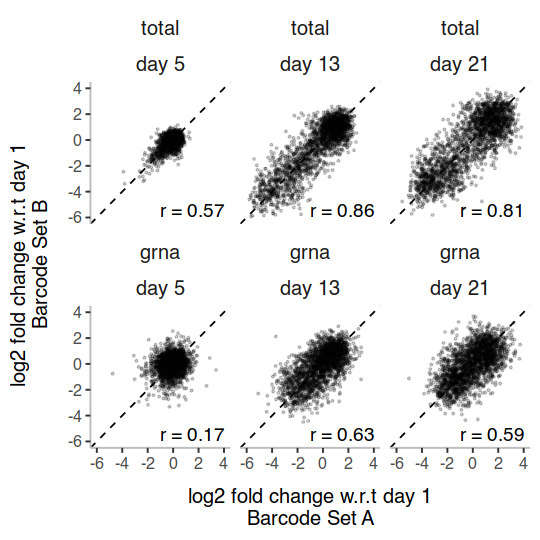

In [11]:
options(repr.plot.width = 4.5, repr.plot.height = 4.5)
plot_data <- mageck_gene_random_partition %>% 
  separate(gene, c("gene", "barcode_group"), sep = "_") %>%
  mutate(type = str_extract(treatment, "grna|total")) %>% 
  select(type, day, lfc, gene, barcode_group) %>% 
  pivot_wider(names_from = barcode_group, values_from = lfc) %>% 
  mutate(day = fct_relevel(day, "day 5", "day 13", "day 21")) %>% 
  mutate(type = fct_relevel(type, "total", "grna"))


correlation  <- plot_data %>% 
  group_by(type, day) %>% 
  nest() %>% 
  mutate(cor = map(data, function(df) cor.test(~ A + B, data=df, method = "pearson", exact = F))) %>% 
  mutate(cor = map(cor, broom::tidy)) %>%
  select(-data) %>% 
  unnest(cor) 

plot_data %>% 
  ggplot(aes(x = A, y = B)) +
  facet_wrap(~type + day, ncol = 3, scales = "fixed") +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed") +
  geom_point(alpha = 0.2, size = 0.5) +
  geom_text(data = correlation, aes(label = paste0("r = ", round(estimate, 2))), x = -1, y = -6, hjust = 0, vjust = 0, size = 4) +
  labs(x = "log2 fold change w.r.t day 1\nBarcode Set A", y = "log2 fold change w.r.t day 1\nBarcode Set B") +
  scale_x_continuous(limits = c(-6, 4)) +
  scale_y_continuous(limits = c(-6, 4))

ggsave("../figures/mageck_fitness_compare_barcode_scatter.pdf", width = 4.5, height = 4.5)